In this notebook, we would understand how to extract this data from WhatsApp, carry out some preprocessing, explore and then extract some interesting observations. The data I worked on was gotten from a friendly group of which I am an active participant, the text contained information from 12th April 2022 to 27th december, 2022 and contained about 10,000+ rows after some necessary preprocessing.

To obtain the data, you have to export it from WhatsApp and this is done using the ‘export data' option. 

First of all, we start by importing the necessary tools for data analysis and manipulation. We would be making use of the natural language tool kits(NLTK) for our text processing.

In [3]:
# pip install emoji


In [4]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import regex 
import re, nltk
import emoji
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
wordnet_lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS

Next, we would need to define some necessary functions that would be able to work on the text and present it in a format that would be great for analysis.

## Data cleaning

### Method 1


In [ ]:

# import regex
# import pandas as pd
# import numpy as np
# !pip install emoji
# import emoji
# from collections import Counter
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# from matplotlib.ticker import MaxNLocator
# from plotly import express as px
# import seaborn as sns
# from datetime import *
# import datetime as dt

### Detecting data and time tokens 


In [ ]:
# def startsWithDate(s):
#     pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
#     result = regex.match(pattern, s)
#     if result:
#         return True
#     return False

### Detecting the participant token

In [ ]:
# def startsWithAuthor(s):
#     patterns = [
#         '([\w]+):',                        # First Name
#         '([\w]+[\s]+[\w]+):',              # First Name + Last Name
#         '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
#         '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
#         '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
#         '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
#     ]
#     pattern = '^' + '|'.join(patterns)
#     result = regex.match(pattern, s)
#     if result:
#         return True
#     return False

### Extracting and combining tokens


In [ ]:
# def getDatapoint(line):
#     splitline = line.split(' - ')
#     dateTime = splitline[0]
#     date, time = dateTime.split(", ")
#     message = " ".join(splitline[1:])
#     if startsWithAuthor(message):
#         splitmessage = message.split(": ")
#         author = splitmessage[0]
#         message = " ".join(splitmessage[1:])
#     else:
#         author= None
#     return date, time, author, message

### Parsing the entire file and handling Multi-Line Messages

In [ ]:
# data = []
# conversation = 'navabs_chat_whatsapp.txt'
# with open(conversation, encoding="utf-8") as fp:
#     fp.readline()
#     messageBuffer = []
#     date, time, author = None, None, None
#     while True:
#         line = fp.readline()
#         if not line:
#             break
#         line = line.strip()
#         if startsWithDate(line):
#             if len(messageBuffer) > 0:
#                 data.append([date, time, author, ' '.join(messageBuffer)])
#             messageBuffer.clear()
#             date, time, author, message = getDatapoint(line)
#             messageBuffer.append(message)
#         else:
#             messageBuffer.append(line)

In [ ]:
# df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
# df['Date'] = pd.to_datetime(df['Date'])

## Method 2

In [8]:
# Function to detect the date at the start of the line to make each row unique.
def DateTime(s):
    regex_format = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(regex_format, s)
    if result:
        return True
    return False

# Function to extract the group chat participant names
def Participants(a):
  a=a.split(":")
  if len(a)==2:
    return True
  else:
    return False

# Function to organize the data properly to be represented as a pandas dataframe
def GetDataPoints(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if Participants(message): 
        splitMessage = message.split(': ') 
        participants = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        participants = None
    return date, time, participants, message

 # Function to extract the emojis and add them to a new column
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)

    return emoji_list

In [9]:
parsedData=[]
data = [] 
text_data = 'navabs_chat_whatsapp.txt' # replace with the file name of your text data
with open(text_data, encoding="utf-8") as fp: #fp stands for file pointer and helps in reading in the data
    fp.readline()
    messageBuffer = [] 
    date, time, participants = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if DateTime(line): 
            if len(messageBuffer)> 0: 
                parsedData.append([date, time, participants, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, participants, message = GetDataPoints(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

It’s time to visualize what we have done so far. After running this code cell, you would observe that your dataframe has 5 columns namely Date, Time, Participants, Message and Emoji.

In [125]:
clean_data = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Participants', 'Message']) # Reading in the data in a dataframe form
clean_data["Date"] = pd.to_datetime(clean_data["Date"])# making sure the date column is in a datetime format.  
clean_data["emoji"] = clean_data["Message"].apply(split_count) # Applying the emoji function to extract the emojis from the messages.

clean_data.head(5) # Having a look at the first 10 entries

,Date,Time,Participants,Message,emoji
0,2022-12-04,11:45,None,"Ayushmann Tiwari ME created group ""PAVAN Unite...",[⚒️]
1,2022-04-21,17:36,None,Navdesh Yadav ME added you,[]
2,2022-04-21,17:36,Navdesh Yadav ME,@916378533796 send kr,[]
3,2022-04-21,17:36,None,"Ayushmann Tiwari ME changed the subject from ""...","[⚒️, ⚒️]"
4,2022-04-21,17:36,Navdesh Yadav ME,😂,[😂]


Before we dive in straight to the data exploration, there are some messages we need to get rid of because these messages won’t add any add any significant value to our final analysis.



In [13]:
clean_data = clean_data[clean_data.Message != '<Media omitted>']
clean_data = clean_data[clean_data.Message != 'This message was deleted']
clean_data = clean_data[clean_data.Message != 'You were added'] 


In [126]:
clean_data.head()

,Date,Time,Participants,Message,emoji
0,2022-12-04,11:45,None,"Ayushmann Tiwari ME created group ""PAVAN Unite...",[⚒️]
1,2022-04-21,17:36,None,Navdesh Yadav ME added you,[]
2,2022-04-21,17:36,Navdesh Yadav ME,@916378533796 send kr,[]
3,2022-04-21,17:36,None,"Ayushmann Tiwari ME changed the subject from ""...","[⚒️, ⚒️]"
4,2022-04-21,17:36,Navdesh Yadav ME,😂,[😂]


In [127]:
# remove rows where participants entries are none
clean_data=clean_data.dropna(subset=['Participants'])
clean_data.head()

,Date,Time,Participants,Message,emoji
2,2022-04-21,17:36,Navdesh Yadav ME,@916378533796 send kr,[]
4,2022-04-21,17:36,Navdesh Yadav ME,😂,[😂]
5,2022-04-21,17:36,Anuj ME,😂,[😂]
6,2022-04-21,17:36,Balbir,Dekh le mail link,[]
7,2022-04-21,17:37,Navdesh Yadav ME,Thik,[]


## Exploratory Data Analysis
From this point, there are tons of ideas that can be carried out on this new and unique data, you can decide to check the number of participants, how active they were, common words used by everyone and much more.

### Visualizing common words in the text messages using Wordcloud
Before visualizing the text in wordcloud form, we need to tokenize the text(separate it into tokens), remove stopwords( e.g it, we, they) and lemmatize the text so that similar words can be converted to their base forms.

In [16]:
messages = []
stop_words = set(stopwords.words('english'))

for words in clean_data['Message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] #lemmatizes the words i.e convert similar words to their
    # base form while still considering the context in which the words are used 
    
    messages.append(' '.join(lemmas)) 

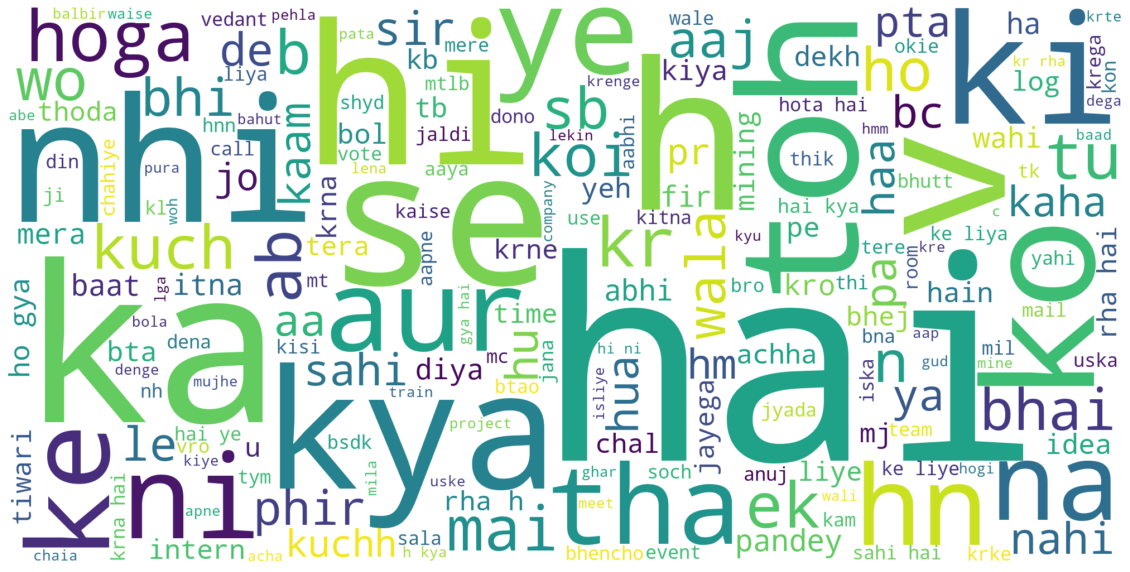

In [17]:
#Let's use worldcloud to visualize the messages
unique_string=(" ").join(messages)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can also decide to visualize the most important terms using CountVectorizer;

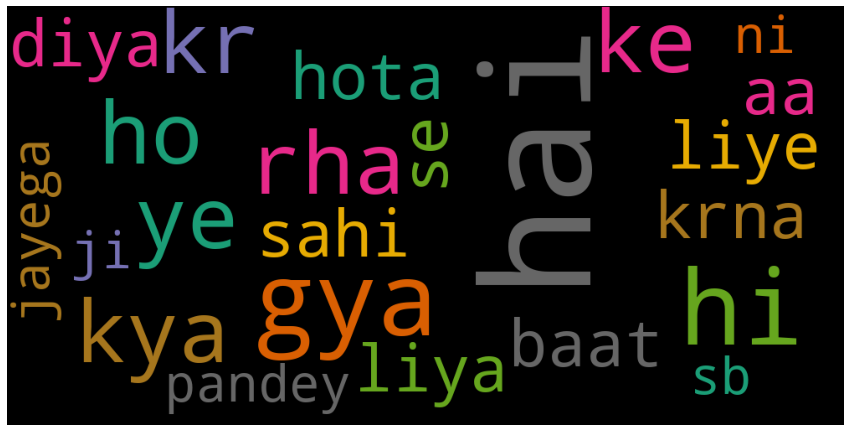

In [18]:
#let us find the most important words in messages using countvectorizer
cv = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
important_words = cv.fit_transform(messages)
fig_words = cv.vocabulary_

#wordcloud for important words 
unique_data=(" ").join(fig_words)
wordcloud = WordCloud(width = 1000, height = 500,colormap="Dark2").generate(unique_data)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

### word frequecny

In [20]:
co = CountVectorizer(ngram_range=(2,2),stop_words='english')
counts = co.fit_transform(messages)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False).head(50)

,0
ho gya,79
rha hai,63
ke liye,59
ke liya,58
hota hai,57
hai kya,55
sahi hai,42
krna hai,41
hai ye,41
kr rha,38


### Emoji frequency


In [21]:
Total_emojis = list([a for b in clean_data.emoji for a in b])
emoji_list = dict(Counter(Total_emojis))
emoji_list = sorted(emoji_list.items(), key=lambda x: x[1], reverse=True)
for i in emoji_list:
  print(i)

('😂', 1008)
('\U0001f972', 437)
('🙂', 274)
('🤧', 200)
('😬', 173)
('\U0001f979', 158)
('😌', 156)
('🌚', 148)
('🥺', 111)
('🔥', 94)
('🥳', 93)
('\U0001fae0', 88)
('🌝', 82)
('❤️', 68)
('🤣', 67)
('😶', 63)
('😁', 63)
('🙏', 57)
('🙃', 54)
('😅', 52)
('\U0001fae1', 48)
('😭', 37)
('🤦🏻\u200d♂️', 36)
('\U0001fae3', 32)
('✨', 29)
('🙇🏻\u200d♂️', 28)
('😉', 25)
('🙈', 25)
('😩', 24)
('🤩', 23)
('🤭', 23)
('\U0001fac2', 22)
('😕', 21)
('\U0001fae4', 21)
('😐', 21)
('🙏🏻', 20)
('🤯', 20)
('🚨', 20)
('😹', 19)
('🎉', 18)
('🐱', 18)
('🥱', 16)
('🆘', 16)
('😊', 15)
('👀', 15)
('👍', 14)
('😾', 14)
('💀', 13)
('🥶', 11)
('😑', 10)
('🙌🏻', 10)
('👉🏼', 10)
('👈🏼', 10)
('👏', 10)
('😳', 10)
('\U0001fae5', 9)
('😛', 9)
('😈', 8)
('🤷\u200d♂️', 8)
('😴', 8)
('🤷🏻\u200d♂️', 8)
('☹️', 8)
('😏', 8)
('\U0001fae2', 7)
('😒', 7)
('😎', 7)
('🤔', 7)
('😆', 7)
('😝', 7)
('😱', 7)
('🙇\u200d♂️', 7)
('➕', 7)
('😤', 6)
('😍', 6)
('💥', 6)
('😋', 6)
('😙', 6)
('⚡', 6)
('👌🏻', 6)
('😢', 5)
('🥴', 5)
('✌🏻', 5)
('🥵', 5)
('😼', 5)
('💩', 5)
('\U0001f978', 5)
('🤙🏻', 5)
('😫', 5)
(

### Total number of messages of each participants

In [79]:
# make a copy of dataframe
df=clean_data

In [106]:

# Creates a list of unique participants
lst = df.Participants.unique()
val=[]
for i in range(len(lst)):
  # Filtering out messages of particular user
  req_df = df[df["Participants"] == lst[i]]
  val.append(req_df.shape[0])
  # req_df will contain messages of only one particular user
  print(lst[i],'  ->  ',req_df.shape[0])

Navdesh Yadav ME   ->   3881
Anuj ME   ->   1905
Balbir   ->   596
Shubham Pandey ME   ->   1459
Ayushmann Tiwari ME   ->   2585
Vedant ME   ->   446


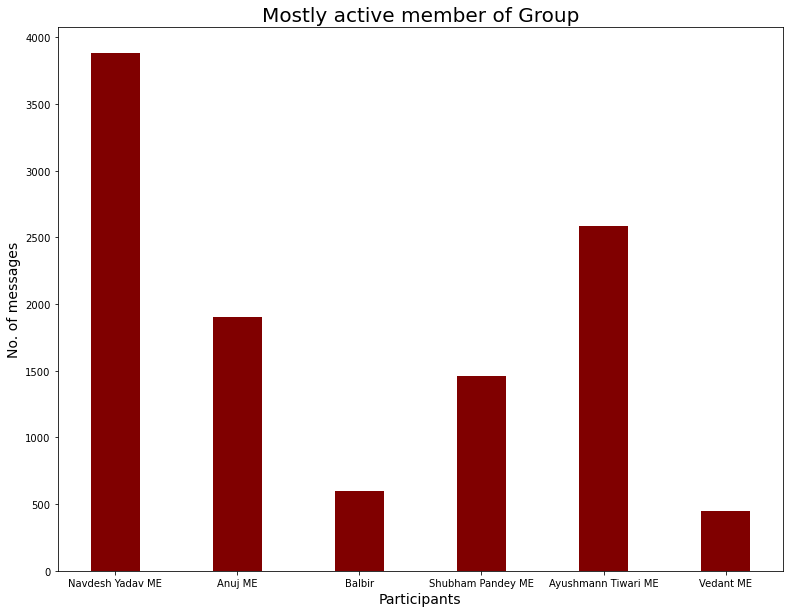

In [110]:
### Mostly Active Author in the Group
plt.figure(figsize=(13,10))
mostly_active = df['Participants'].value_counts()
### Top 10 peoples that are mostly active in our Group is : 

plt.xlabel('Participants',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of Group',fontdict={'fontsize': 20,'fontweight': 8})
# creating the bar plot
plt.bar(lst, val, color ='maroon',
        width = 0.4)
plt.show()

In [81]:
### ----------- Checking shape of dataset.
# df.shape

### ---------- Checking basic information of dataset
# df.info()

### ----------  Checking no. of null values in dataset
# df.isnull().sum()

### ---------- Checking head part of dataset
# df.head(20)

### -------- Checking tail part of dataset
# df.tail(20)

### -------- Droping Nan values from dataset
# df = df.dropna()
# df = df.reset_index(drop=True)
# df.shape

### --------- Checking no. of authors of group
# df['Participants'].nunique()

### --------- Checking authors of group
# df['Participants'].unique()

In [82]:
df.shape

(10872, 5)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10872 entries, 2 to 12578
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10872 non-null  datetime64[ns]
 1   Time          10872 non-null  object        
 2   Participants  10872 non-null  object        
 3   Message       10872 non-null  object        
 4   emoji         10872 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 509.6+ KB


In [84]:
df.isnull().sum()

Date            0
Time            0
Participants    0
Message         0
emoji           0
dtype: int64

In [124]:
df.head(5)

,Date,Day,Time,Participants,Message,emoji,Letter,Word,urlcount,Media_Count
0,2022-04-21,Thrusday,17:36,Navdesh Yadav ME,@916378533796 send kr,[],21,3,0,22
1,2022-04-21,Thrusday,17:36,Navdesh Yadav ME,😂,[😂],1,1,0,2
2,2022-04-21,Thrusday,17:36,Anuj ME,😂,[😂],1,1,0,2
3,2022-04-21,Thrusday,17:36,Balbir,Dekh le mail link,[],17,4,0,18
4,2022-04-21,Thrusday,17:37,Navdesh Yadav ME,Thik,[],4,1,0,5


In [123]:
df.tail(5)

,Date,Day,Time,Participants,Message,emoji,Letter,Word,urlcount,Media_Count
10867,2022-12-27,Tuesday,18:20,Navdesh Yadav ME,*hn,[],3,1,0,4
10868,2022-12-27,Tuesday,18:42,Shubham Pandey ME,Thoda sabr rkh...,[],17,3,0,18
10869,2022-12-27,Tuesday,18:53,Ayushmann Tiwari ME,Heinji Kya krte rhte be tm log 😂,[😂],32,8,0,33
10870,2022-12-27,Tuesday,18:58,Anuj ME,Kuch kas nhi,[],12,3,0,13
10871,2022-12-27,Tuesday,21:43,Navdesh Yadav ME,Baki thik lgra hai sb niche,[],27,6,0,28


In [87]:
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(10872, 5)

In [88]:
df['Participants'].nunique()

6

In [89]:
df['Participants'].unique()

array(['Navdesh Yadav ME', 'Anuj ME', 'Balbir', 'Shubham Pandey ME',
       'Ayushmann Tiwari ME', 'Vedant ME'], dtype=object)

In [120]:
###--------  Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)

### ----------- Rearranging the columns for better understanding
df = df[['Date','Day','Time','Participants','Message','emoji']]

### ----------- Changing the datatype of column "Day".
df['Day'] = df['Day'].astype('category')

### ---------- Looking newborn dataset.
df.head()

### ---------- Counting number of letters in each message
df['Letter'] = df['Message'].apply(lambda s : len(s))

### ---------- Counting number of word's in each message
df['Word'] = df['Message'].apply(lambda s : len(s.split(' ')))

### ---------- Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

###--------- Function to count number of media in chat.
MEDIAPATTERN = r''
df['Media_Count'] = df.Message.apply(lambda x : regex.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)

###------- Looking into updated dataset
# df  commented due to privacy reason

<ipython-input-120-16a0c14768eb>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-120-16a0c14768eb>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-120-16a0c14768eb>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-120-

## Time series analysis

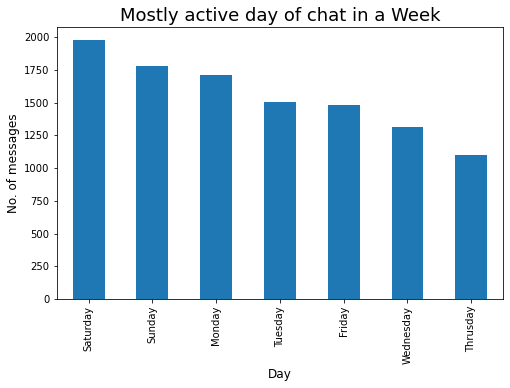

In [91]:

### ------ Mostly Active day in the chat
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts()

### ------ Most active author in the chat is : 
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of chat in a Week',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

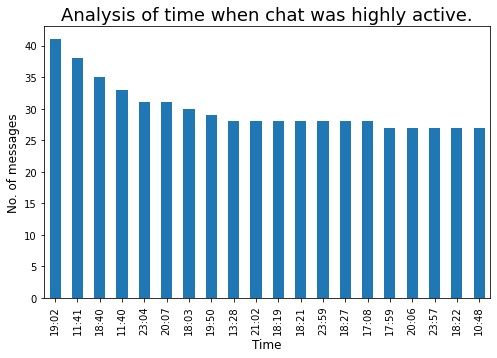

In [92]:
###------  Time whenever the chat is highly active
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #----- Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when chat was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

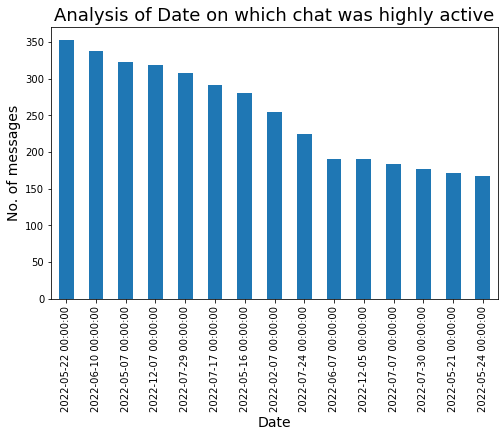

In [93]:

###---- Date on which the chat highly active.
plt.figure(figsize=(8,5))
df['Date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which chat was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

### Converting 12-hour formate to 24 hours will help us for better analysis (we have alredy time in 24hr format)

In [94]:
# from datetime import *
# import datetime as dt
# lst = []
# for i in df['Time']:
#   out_time = datetime.strftime(datetime.strptime(i,"%I:%M %p"),"%H:%M")
#   lst.append(out_time)
# df['24H_Time'] = lst
# df['Hours'] = df['24H_Time'].apply(lambda x : x.split(':')[0])

### Most suitable hour of the day whenever there will be more chances of getting a response from user

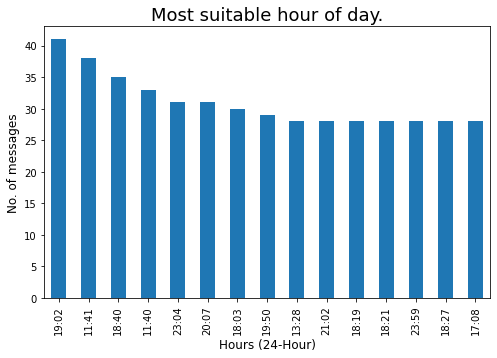

In [95]:

###------ Most suitable hour of day, whenever there will more chances of getting responce from group members.
plt.figure(figsize=(8,5))
std_time = df['Time'].value_counts().head(15)
s_T = std_time.plot.bar()
s_T.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Hours (24-Hour)',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Most suitable hour of day.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

### Formatting Whatsapp Chats for NLP
To analyze our whatsapp conversations, initially, our conversation needs to be formatted in the form of data. This involved a few basic steps in achieving the formation of data by creating a dictionary, constructed within two keys with each of the respective values with a list of the person tokenized conversations.



### Making a dictionary with key- List of messages pair

In [97]:
from collections import defaultdict
ppl=defaultdict(list)
for index in df.index:
    
    ppl[df['Participants'][index]].append(df['Message'][index])

In [119]:
#commented due to privacy reasons
# ppl 

### Classification of Dialogues
The classification of tokenized conversations will ne be achieved by training a Naive Bayes Classification model or the training set with some pre-categorized chat styles conversations:

In [100]:
import nltk
# nltk.download('nps_chat')

posts = nltk.corpus.nps_chat.xml_posts()

def extract_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
    return features

fposts = [(extract_features(p.text), p.get('class')) for p in posts]
test_size = int(len(fposts) * 0.1)
train_set, test_set = fposts[test_size:], fposts[:test_size]
classifier = nltk.NaiveBayesClassifier.train(train_set)

Our trained model can be tested by using a test set or even by user input. Our model is trained in a way that can classify any tokenized sentence into different categories like Greetings, Statements, Emotions, questions, etc.

In [101]:
classifier.classify(extract_features('Hi there!'))

'Greet'

In [102]:
classifier.classify(extract_features('Do you want to watch a film later?'))

'ynQuestion'

NLP for WhatsApp Chats Emotions

In [117]:
def extract_emojis(str):
  return ''.join(c for c in str if c in emoji.EMOJI_DATA)

for key, val in ppl.items():
    emojis=extract_emojis(str(ppl[key]))
    count = Counter(emojis).most_common()[:10]

    print("{}'s emojis:\n {} \n".format(key, emojis))
    print("Most common: {}\n\n".format(count))

Navdesh Yadav ME's emojis:
 😂😬🤧🙂🤧🙂🙃🙃🙃🙃🙃🙃🙃😂😂🤧🌚😁🙃🙂🤧😭😢🥺😂😉😶😵💫😶🤣😂😂😅🤧🤧😂☠⚽🏼🏼✊🏻🙂🙂🙂🙂🙂🤣😶🙂😵💫🤩🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🤣😅😂🙂😶😵💫🙂😅🙂😂🙂🙂😂🙂😂🌚😂👉🏼👈🏼😂🤣🤣🤣🤣🤣😂🤣🙂🙂🙂😶😂😶😶😶🙂😂😂🌚😅😂😬😍😒🤯🥵🔥🔥🔥😂😅😅😂🙂🙂🙂🌚😂😬😬😬😂🤣😶😶🙌🏻😕😬😬😶😂👉🏼👈🏼😂😂🤧😬😬😬😬😶😕👉🏼👈🏼🌝😛🙂😶😶😶😂💣💥🙂🙂😌😭🌝😂🙈😂😂🤣😂😕😅😂🙂😂🤣😂😴😴😴🌝😂🌝🤧😌😂🤧🌚😂🤧😂🤣✌🏻😂🤧😂😂😁😅😂💀🙂🙃🤧🙃😂😅😬😂🙂😂😂👉🏼👈🏼🌝🌚😕😁🤩🌚🌝😂😂😂😂😂😌🙂🥺🥺🥵🤧🥺🌚😛😛😛😂😕🙃🌚😂🤣👬😂😂😉😴😴😂😂🤧😂🌚🌚🤞🏻😂😂🌝😂😂😂😌😁🥵😕😁🏊😂🤣😬🌝😂🤣😂😂😂🤣😌😝😂😕😂😝😂🙃🤜🏻💥🤛🏻😌😂💥🌚🙃🤩🌚🙃😂🌝🙃😝😂😂😂😂😂😅😂😂🌝🌝😴😂🌝😂🌝🌝😁🤧😅🤩😂😅😕😴😂😂😂😂😂😌🤧😂🤣😂😳🌝😂🤧😂😂🌚😂🤣🤧😤🙈😂😋😋😅🤣😂🤣😂🤣😩😂😬😑😩😶🙃🙂😅😂🙃😂🤩😉😂😁🙃😂🤧🌚🌚🌚🌚😂😎😂🤧🤟🏼😕🏃💨🤧😂🤧😂😶😉🥰😂🤣🙃😩😂😂😂😂😅😂🤩😂😩😂😌😂😌😂😂😂👹💯👉🏼👈🏼🙃😂😂😂😶😂🤩🤩🤩🤩🤩🙃😂🌚😂🤧😂😶😂😌😌😂😶😂🤧😂😂😂😂😂🙃😂🤣🤣🤣👹👉🏼👈🏼😌🤩🍻🍻🍻💩💩💩😂😂😶😂😂🌚😌😏😏😏😋😂😂🌚🌚😶😅😂😂🔒👾😳😳😳😂😂🤣😂🤧😌😌😂😂😂🤣😂👉🏼👈🏼😂😂😂😂🤩🤩🤩😢😂🤣😂😅😂💥🔥😂😳😂🤣🤣😂😛😂😅🙃😶🤧😂😂🤣😂🤢🤮😂🤣🤧🤣😂🤣😂😍😂😂😂😅🤑🌚😂👍🏼😂🥺🥺🥺🥺🥺🥺😂➕➕➕➕➕➕➕😫😫😫😫😂😂😂😂🤣🔥🔥🔥🍅😂🥺🙃😂🥺🤧🥺🥺😶😐😫😩🎷🥺🤧😐😐😐😂😩😂😂😂😂😉😂😂😉🤡👉🏼👈🏼😉😂😂🤣🤣🤣🙃🙃😬🥺🥺👉🏼👈🏼🙃😕😬😂😂😂🌚🤣🤣🤣🤣🤣😛🥺😂😂😂😂😂😁😂😁🙃🤡🙃😂😂👀😂😅😂😂😏😂😂😂😂😂😛😂😂😣😕😞😂🤣🙃😩😩🥰😭😭😩😂🤭😶😏😂😉💀👍🏼👍🏼😂🎉🥳😂😶🤩🙃😂🤭🤣😂🤣😂🤣😂🤣😂🤣😂🤣😂😕🍿😂😕😂🤣😌😌😛😂😶😂😋😶🤘🏻😂😪😶😶😕😂😪😂😂😂😂😂😂😂😶😶😶😶♥😂🙃🚨🆘🚨🆘🚨🆘🚨🆘🚨🚨🆘🚨🆘🚨🆘🚨🆘🚨🚨🆘🚨🆘🚨🆘🚨🆘🚨🚨🆘🚨🆘🚨🆘🚨🆘🚨🙃😁😂😂🌚😂😬😂🙃😶😶🙃🙂🤬🥺🥺🥺😭😬🥺🤯😌🐂💩👉🏼👈🏼😌🤭😂🤣😂🙃🙃😬😬😬🙃😶🐝🤔🤧🙂🌚🙂🙂🙂🙂🙂👊🏻🙂😛😂😂🙂🙃😌😶😶😶🤡😂😂 

Most common: [('😂', 243), ('🤣', 53), ('😶', 40), ('🙂', 39), ('🙃', 39), ('🤧', 30), ('🌚', 26), ('🏼', 2